In [19]:
import pandas as pd

In [20]:
# pip install --upgrade pandas

In [21]:
df = pd.read_xml('/content/drive/MyDrive/datafile.xml')
df

,SR_NO,CITY,ZONE,AGE,GENDER,LATITUDE,LONGITUDE,RESULT,SAMPLE_RESULT,RESULTDATE
0,1,Surat,South West Zone,21,F,21.169700,72.793300,Cured/Discharged,Positive,19/03/2020
1,2,Surat,Central Zone,67,M,21.186900,72.816000,Death,Positive,20/03/2020
2,3,Surat,East Zone B,50,F,21.211302,72.868206,Cured/Discharged,Positive,10/06/2020
3,4,Surat,South Zone,26,M,21.139700,72.824100,Cured/Discharged,Positive,28/03/2020
4,5,Surat,West Zone,55,M,21.205612,72.804538,Cured/Discharged,Positive,11/06/2020
...,...,...,...,...,...,...,...,...,...,...
3586,3587,Surat,West Zone,62,F,21.194738,72.805488,Death,Positive,07/07/2020
3587,3588,Surat,Central Zone,63,M,21.195005,72.819476,Death,Positive,06/07/2020
3588,3589,Surat,South West Zone,82,M,21.147368,72.759609,Death,Positive,07/07/2020
3589,3590,Surat,South West Zone,47,M,21.159184,72.806529,Death,Positive,06/07/2020


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SR_NO          3591 non-null   int64  
 1   CITY           3591 non-null   object 
 2   ZONE           3582 non-null   object 
 3   AGE            3591 non-null   int64  
 4   GENDER         3591 non-null   object 
 5   LATITUDE       3591 non-null   float64
 6   LONGITUDE      3591 non-null   float64
 7   RESULT         3591 non-null   object 
 8   SAMPLE_RESULT  3591 non-null   object 
 9   RESULTDATE     3591 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 280.7+ KB


In [23]:
df['SAMPLE_RESULT'].unique()

array(['Positive'], dtype=object)

In [24]:
df['RESULT'].unique()

array(['Cured/Discharged', 'Death', 'Active'], dtype=object)

In [25]:
df_active = df[df.RESULT == 'Active']
len(df_active)

15

In [26]:
df_active

,SR_NO,CITY,ZONE,AGE,GENDER,LATITUDE,LONGITUDE,RESULT,SAMPLE_RESULT,RESULTDATE
510,511,Surat,South East Zone,25,M,21.179004,72.808405,Active,Positive,25/04/2020
537,538,Surat,South Zone,24,M,21.155138,72.829704,Active,Positive,26/04/2020
950,951,Surat,South East Zone,35,M,21.190477,72.849517,Active,Positive,13/05/2020
1110,1111,Out City,NaN,70,F,21.150554,72.802457,Active,Positive,18/05/2020
1163,1164,Out City,NaN,73,M,21.150554,72.802457,Active,Positive,19/05/2020
1165,1166,Surat,South Zone,41,M,21.153726,72.839782,Active,Positive,20/05/2020
1246,1247,Surat,South Zone,55,M,21.153215,72.826778,Active,Positive,24/05/2020
1360,1361,Surat,South West Zone,50,F,21.132690,72.742156,Active,Positive,24/05/2020
1519,1520,Out City,NaN,72,M,21.221749,72.783043,Active,Positive,28/05/2020
1529,1530,Out City,NaN,56,F,21.157700,72.776840,Active,Positive,28/05/2020


In [27]:
Active_df = df['SAMPLE_RESULT'] == 'Active'
Active_df

0       False
1       False
2       False
3       False
4       False
        ...  
3586    False
3587    False
3588    False
3589    False
3590    False
Name: SAMPLE_RESULT, Length: 3591, dtype: bool

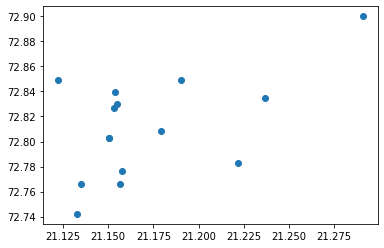

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df_active['LATITUDE'],df_active['LONGITUDE'])

In [29]:
from sklearn.cluster import DBSCAN

In [60]:
db = DBSCAN(eps = 0.02, min_samples= 1)

In [61]:
ypredict = db.fit_predict(df_active[['LATITUDE','LONGITUDE']])
ypredict

array([ 0,  1,  2,  3,  3,  1,  1,  4,  5,  6,  6,  7,  8,  9, 10])

In [62]:
df_active['group'] = ypredict
df_active

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SR_NO,CITY,ZONE,AGE,GENDER,LATITUDE,LONGITUDE,RESULT,SAMPLE_RESULT,RESULTDATE,group
510,511,Surat,South East Zone,25,M,21.179004,72.808405,Active,Positive,25/04/2020,0
537,538,Surat,South Zone,24,M,21.155138,72.829704,Active,Positive,26/04/2020,1
950,951,Surat,South East Zone,35,M,21.190477,72.849517,Active,Positive,13/05/2020,2
1110,1111,Out City,NaN,70,F,21.150554,72.802457,Active,Positive,18/05/2020,3
1163,1164,Out City,NaN,73,M,21.150554,72.802457,Active,Positive,19/05/2020,3
1165,1166,Surat,South Zone,41,M,21.153726,72.839782,Active,Positive,20/05/2020,1
1246,1247,Surat,South Zone,55,M,21.153215,72.826778,Active,Positive,24/05/2020,1
1360,1361,Surat,South West Zone,50,F,21.132690,72.742156,Active,Positive,24/05/2020,4
1519,1520,Out City,NaN,72,M,21.221749,72.783043,Active,Positive,28/05/2020,5
1529,1530,Out City,NaN,56,F,21.157700,72.776840,Active,Positive,28/05/2020,6


No handles with labels found to put in legend.


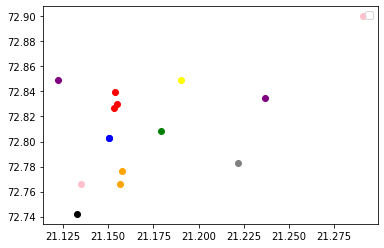

In [63]:
df0 = df_active[df_active.group ==0]
df1 = df_active[df_active.group ==1]
df2 = df_active[df_active.group ==2]
df3 = df_active[df_active.group ==3]
df4 = df_active[df_active.group ==4]
df5 = df_active[df_active.group ==5]
df6 = df_active[df_active.group ==6]
df7 = df_active[df_active.group ==7]
df8 = df_active[df_active.group ==8]
df9 = df_active[df_active.group ==9]
df10 = df_active[df_active.group ==10]
plt.scatter(df0['LATITUDE'],df0['LONGITUDE'], color = 'green')
plt.scatter(df1['LATITUDE'],df1['LONGITUDE'], color = 'red')
plt.scatter(df2['LATITUDE'],df2['LONGITUDE'], color = 'yellow')
plt.scatter(df3['LATITUDE'],df3['LONGITUDE'], color = 'blue')
plt.scatter(df4['LATITUDE'],df4['LONGITUDE'], color = 'black')
plt.scatter(df5['LATITUDE'],df5['LONGITUDE'], color = 'grey')
plt.scatter(df6['LATITUDE'],df6['LONGITUDE'], color = 'orange')
plt.scatter(df7['LATITUDE'],df7['LONGITUDE'], color = 'purple')
plt.scatter(df8['LATITUDE'],df8['LONGITUDE'], color = 'pink')
plt.scatter(df9['LATITUDE'],df9['LONGITUDE'], color = 'purple')
plt.scatter(df10['LATITUDE'],df10['LONGITUDE'], color = 'pink')
plt.legend()

In [64]:
import numpy as np

In [65]:
# clusterCount = np.bincount(ypredict)
# clusterCount

In [66]:
# clusterCount.max()

In [67]:
from sklearn.neighbors import NearestNeighbors

In [68]:
x = df_active['LATITUDE'], df_active['LONGITUDE']

In [69]:
x = pd.concat([df_active["LATITUDE"], df_active["LONGITUDE"]], axis =1, keys=['LATITUDE','LONGITUDE'])
x

,LATITUDE,LONGITUDE
510,21.179004,72.808405
537,21.155138,72.829704
950,21.190477,72.849517
1110,21.150554,72.802457
1163,21.150554,72.802457
1165,21.153726,72.839782
1246,21.153215,72.826778
1360,21.132690,72.742156
1519,21.221749,72.783043
1529,21.157700,72.776840


In [70]:
# neighbors = NearestNeighbors(n_neighbors=1)
# neighbors_fit = neighbors.fit(x)
# distances, indices = neighbors_fit.kneighbors(x)

In [71]:
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.plot(distances)

In [76]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

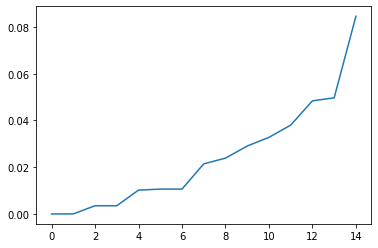

In [77]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [78]:
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.plot([0,14],[distances[0], distances[14]])
# plt.plot(distances)

In [79]:
# distances

In [80]:
# import math
# def calc_distance(x1,y1,a,b,c):
#   d= abs((a*x1+b*y1+c))/ (math.sqrt(a*a+b*b))
#   return d

In [81]:
# K = range(0,15)

In [82]:
# a = distances[0] -  distances[14]
# b = K[10]-K[0]
# c1 = K[0] * distances[14]
# c2 = K[14] * distances[0]
# c = c1-c2

In [83]:
# Dist =[]

# for k in range(15):
#   Dist.append(calc_distance(K[k],distances[k],a,b,c))

In [84]:
# plt.plot(K,Dist)

In [85]:
# plt.scatter(df['LATITUDE'],df['LONGITUDE'])

<h1> Part 2 <h1>

In [90]:
x1 = pd.concat([df["LATITUDE"], df["LONGITUDE"]], axis =1, keys=['LATITUDE','LONGITUDE'])

In [91]:
neigh = NearestNeighbors(n_neighbors=50)
nbrs = neigh.fit(x1)
distances, indices = nbrs.kneighbors(x1)

In [92]:
distances.max()

0.10508102803794016

In [93]:
indices.max()

3590

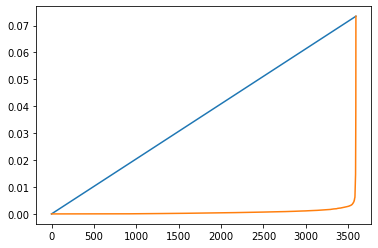

In [94]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot([0,3590],[distances[0], distances[3590]])
plt.plot(distances)

In [95]:
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# # plt.plot([distances[0], distances[3590]],[0,3590])
# plt.plot(distances)

In [96]:
import math
def calc_distance(x1,y1,a,b,c):
  d= abs((a*x1+b*y1+c))/ (math.sqrt(a*a+b*b))
  return d

In [97]:
K = range(0,3591)

In [98]:
a = distances[0] -  distances[3590]
b = K[3590]-K[0]
c1 = K[0] * distances[3590]
c2 = K[3590] * distances[0]
c = c1-c2

In [99]:
Dist1 =[]

for k in range(3591):
  Dist1.append(calc_distance(K[k],distances[k],a,b,c))

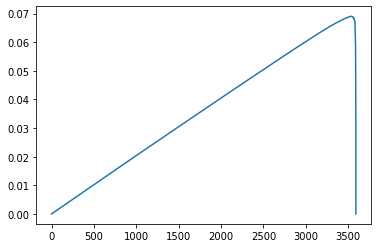

In [100]:
plt.plot(K,Dist1)

In [113]:
eps_value = max(Dist1) / 10
eps_value

0.0069086696610963835

In [102]:
x1

,LATITUDE,LONGITUDE
0,21.169700,72.793300
1,21.186900,72.816000
2,21.211302,72.868206
3,21.139700,72.824100
4,21.205612,72.804538
...,...,...
3586,21.194738,72.805488
3587,21.195005,72.819476
3588,21.147368,72.759609
3589,21.159184,72.806529


In [130]:
db1 = DBSCAN(eps = eps_value, min_samples= 40)

In [131]:
ypred = db1.fit_predict(df[['LATITUDE','LONGITUDE']])
ypred

array([-1,  0,  0, ..., -1, -1,  0])

In [132]:
df_c = df.copy()
df_c['group'] = ypred
df_c

,SR_NO,CITY,ZONE,AGE,GENDER,LATITUDE,LONGITUDE,RESULT,SAMPLE_RESULT,RESULTDATE,group
0,1,Surat,South West Zone,21,F,21.169700,72.793300,Cured/Discharged,Positive,19/03/2020,-1
1,2,Surat,Central Zone,67,M,21.186900,72.816000,Death,Positive,20/03/2020,0
2,3,Surat,East Zone B,50,F,21.211302,72.868206,Cured/Discharged,Positive,10/06/2020,0
3,4,Surat,South Zone,26,M,21.139700,72.824100,Cured/Discharged,Positive,28/03/2020,-1
4,5,Surat,West Zone,55,M,21.205612,72.804538,Cured/Discharged,Positive,11/06/2020,2
...,...,...,...,...,...,...,...,...,...,...,...
3586,3587,Surat,West Zone,62,F,21.194738,72.805488,Death,Positive,07/07/2020,-1
3587,3588,Surat,Central Zone,63,M,21.195005,72.819476,Death,Positive,06/07/2020,0
3588,3589,Surat,South West Zone,82,M,21.147368,72.759609,Death,Positive,07/07/2020,-1
3589,3590,Surat,South West Zone,47,M,21.159184,72.806529,Death,Positive,06/07/2020,-1


In [133]:
n_clu = ypred.max()+1
n_clu

4

In [134]:
color = ['green','red','yellow','purple','black']

No handles with labels found to put in legend.


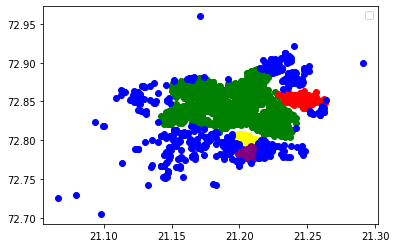

In [135]:
dfm1 = df_c[df_c.group ==-1]

for i in range(n_clu):
  cl = df_c[df_c.group == i]
  plt.scatter(cl['LATITUDE'],cl['LONGITUDE'],color = color[i])


plt.scatter(dfm1['LATITUDE'],dfm1['LONGITUDE'], color = 'blue')
plt.legend()

In [129]:
# df0 = df_c[df_c.group ==0]
# df1 = df_c[df_c.group ==1]
# dfm1 = df_c[df_c.group ==-1]
# df2 = df_c[df_c.group ==2]
# df3 = df_c[df_c.group ==3]

# plt.scatter(df0['LATITUDE'],df0['LONGITUDE'], color = 'green')
# plt.scatter(df1['LATITUDE'],df1['LONGITUDE'], color = 'red')
# plt.scatter(dfm1['LATITUDE'],dfm1['LONGITUDE'], color = 'blue')
# plt.scatter(df2['LATITUDE'],df2['LONGITUDE'], color = 'yellow')
# plt.scatter(df3['LATITUDE'],df3['LONGITUDE'], color = 'purple')
# plt.legend()

<h1>Prediction</h1>

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x1,ypred)

KNeighborsClassifier(n_neighbors=3)

In [104]:
knn.predict([[21.195005,72.819476	]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [105]:
knn.predict([[21.194738,72.805488]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([-1])

In [106]:
# zone = knn.predict([[21.194738,72.805488]])

In [ ]:

inp_LATITUDE = float(input("Enter Latitude of your Location "))
inp_LONGITUDE = float(input("Enter Longitude of your Location"))

zone = knn.predict([[inp_LATITUDE,inp_LONGITUDE]])
print(zone)

if zone == [-1]:
  print("You are IN SAFE ZONE - But still you need to take care")
else :
  print("Be Safe - You are NOT IN SAFE ZONE ")

